In [2]:
# Imports and file paths
import sys
import pandas as pd
from datetime import datetime
import os
import json
print('Python version:', sys.version)

# Standard data science libraries
import numpy as np
import pandas as pd
from pathlib import Path

# sklearn & joblib will be used
import sklearn
import joblib
print('pandas', pd.__version__, 'sklearn', sklearn.__version__)

# Paths (these files were uploaded in this session)
TRAIN_CSV = "/content/SENG_4610_Training_Data.csv"
FEATURES_CSV = "/content/Feature_Description.csv"

# Check files
print('Training CSV exists:', Path(TRAIN_CSV).exists())
print('Feature description exists:', Path(FEATURES_CSV).exists())

# Load CSVs
df = pd.read_csv(TRAIN_CSV, encoding='latin-1')
feat = pd.read_csv(FEATURES_CSV, encoding='latin-1')

print('Training data shape:', df.shape)
display(df.head(10))
print('\n---\nFeature description preview:')
display(feat.head(20))

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
pandas 2.2.2 sklearn 1.6.1
Training CSV exists: True
Feature description exists: True
Training data shape: (175341, 45)


,ï»¿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0



---
Feature description preview:


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [3]:
# Quick EDA
print('Columns:', df.columns.tolist())
print('\nDtypes:\n', df.dtypes.value_counts())

# Missing values summary
missing = df.isna().sum().sort_values(ascending=False)
display(missing.head(30))

# Confirm target column names (adjust if different)
possible_label_cols = ['label', 'Label', 'attack', 'is_attack']
possible_attack_cat = ['attack_cat', 'attack_catagory', 'attack_category', 'attack_type']

print('Columns present that match common names:')
print([c for c in df.columns if c in possible_label_cols])
print([c for c in df.columns if c in possible_attack_cat])

# If your dataset uses different names, update these variables:
BINARY_TARGET = 'label'           # 0 normal, 1 attack
MULTI_TARGET = 'attack_cat'       # multiclass attack category
ID_COL = 'id'

Columns: ['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

Dtypes:
 int64      30
float64    11
object      4
Name: count, dtype: int64


,0
ï»¿id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


Columns present that match common names:
['label']
['attack_cat']


In [4]:
# Drop ID if present
if ID_COL in df.columns:
    df = df.drop(columns=[ID_COL])
    print('Dropped id column')

# Clean service & other textual columns
for col in ['service', 'proto', 'state']:
    if col in df.columns:
        df[col] = df[col].astype(str)
        df[col] = df[col].replace(['-', '?', 'None', 'nan', ''], 'unknown')
        df[col] = df[col].fillna('unknown')

# Show unique counts
for col in ['service', 'proto', 'state']:
    if col in df.columns:
        print(f"-> {col}: unique count =", df[col].nunique(), 'example values =', df[col].unique()[:10])

from sklearn.preprocessing import LabelEncoder

# Ensure binary target is numeric 0/1
if df[BINARY_TARGET].dtype == object:
    # if the label is text like 'Normal'/'Attack' or 'normal'/'anomaly'
    df['is_attack'] = df[BINARY_TARGET].str.lower().isin(
        ['1', 'attack', 'anomaly', 'attack!', 'attack?']
    ).astype(int)
else:
    df['is_attack'] = df[BINARY_TARGET].astype(int)

print('is_attack distribution:')
print(df['is_attack'].value_counts())

-> service: unique count = 13 example values = ['unknown' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius'
 'pop3']
-> proto: unique count = 133 example values = ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp']
-> state: unique count = 9 example values = ['FIN' 'INT' 'CON' 'ECO' 'REQ' 'RST' 'PAR' 'URN' 'no']
is_attack distribution:
is_attack
1    119341
0     56000
Name: count, dtype: int64


In [5]:
# ============================
# Multiclass encoding (improved)
# ============================

if MULTI_TARGET in df.columns:
    # CHANGED: work on a filtered copy that only keeps rows with a real attack_cat
    df_multi = df[df[MULTI_TARGET].notna()].copy()
    print("\nMulticlass rows (non-NaN attack_cat):", len(df_multi))

    # Optional: show original distribution
    print("\nOriginal attack_cat distribution (non-NaN only):")
    print(df_multi[MULTI_TARGET].value_counts())

    # Label encode attack_cat on the filtered df_multi only
    le_attack = LabelEncoder()
    df_multi['attack_cat_encoded'] = le_attack.fit_transform(
        df_multi[MULTI_TARGET].astype(str)
    )

    print('\nMulticlass mapping:')
    mapping = dict(zip(le_attack.classes_, le_attack.transform(le_attack.classes_)))
    print(mapping)
else:
    df_multi = None
    print('No multiclass attack column found; will skip softmax training unless you update MULTI_TARGET.')

# For sanity, still show attack_cat distribution on the full df (will include NaNs)
if MULTI_TARGET in df.columns:
    print('\nattack_cat value_counts (full df, including NaN):')
    print(df[MULTI_TARGET].value_counts(dropna=False))


Multiclass rows (non-NaN attack_cat): 175341

Original attack_cat distribution (non-NaN only):
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

Multiclass mapping:
{'Analysis': np.int64(0), 'Backdoor': np.int64(1), 'DoS': np.int64(2), 'Exploits': np.int64(3), 'Fuzzers': np.int64(4), 'Generic': np.int64(5), 'Normal': np.int64(6), 'Reconnaissance': np.int64(7), 'Shellcode': np.int64(8), 'Worms': np.int64(9)}

attack_cat value_counts (full df, including NaN):
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


In [6]:
# By default drop IPs and timestamp-like fields to avoid leakage and high-cardinality
drop_cols = []
for cand in ['srcip', 'dstip', 'Stime', 'Ltime', 'stime', 'ltime', 'stime_ms']:
    if cand in df.columns:
        drop_cols.append(cand)

print('Initial drop_cols:', drop_cols)

# Numeric columns detection (from df)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# exclude target columns
exclude = ['is_attack', BINARY_TARGET, 'attack_cat_encoded']
numeric_cols = [c for c in numeric_cols if c not in exclude]
print('\nNumeric candidate columns (sample):', numeric_cols[:20])

# Categorical columns to encode
cat_cols = [c for c in ['service', 'proto', 'state'] if c in df.columns]
print('\nCategorical columns to encode:', cat_cols)

# Final features list — for pipeline we'll handle encoding/scaling
features = [c for c in numeric_cols + cat_cols if c not in drop_cols]
print('\nFinal features to be used (sample):', features[:40])

Initial drop_cols: []

Numeric candidate columns (sample): ['ï»¿id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb']

Categorical columns to encode: ['service', 'proto', 'state']

Final features to be used (sample): ['ï»¿id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Define preprocessing steps
num_features = [c for c in features if c in df.columns and np.issubdtype(df[c].dtype, np.number)]
cat_features = [c for c in features if c in df.columns and c not in num_features]

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
], remainder='drop')

print('num_features count:', len(num_features))
print('cat_features count:', len(cat_features))

num_features count: 40
cat_features count: 3


In [8]:
# ============================
# Binary classification
# ============================
from sklearn.neural_network import MLPClassifier

print('\n================ BINARY CLASSIFICATION ================\n')

# Prepare data for binary classification
X = df[features]
y = df['is_attack']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Neural network pipeline (same preprocessing)
mlp_model = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        max_iter=200,
        random_state=42,
        early_stopping=True,
        verbose=True
    ))
])


================ BINARY CLASSIFICATION ================



In [9]:
print('Training MLPClassifier (binary)...')
mlp_model.fit(X_train, y_train)
print('Done.')



Training MLPClassifier (binary)...
Iteration 1, loss = 0.14329366
Validation score: 0.948318
Iteration 2, loss = 0.10062198
Validation score: 0.955660
Iteration 3, loss = 0.09325353
Validation score: 0.956658
Iteration 4, loss = 0.08567800
Validation score: 0.964357
Iteration 5, loss = 0.07821420
Validation score: 0.967707
Iteration 6, loss = 0.07155414
Validation score: 0.967137
Iteration 7, loss = 0.06597820
Validation score: 0.969276
Iteration 8, loss = 0.06168312
Validation score: 0.972840
Iteration 9, loss = 0.05893828
Validation score: 0.972555
Iteration 10, loss = 0.05705680
Validation score: 0.972840
Iteration 11, loss = 0.05520030
Validation score: 0.972198
Iteration 12, loss = 0.05371209
Validation score: 0.976618
Iteration 13, loss = 0.05292465
Validation score: 0.973339
Iteration 14, loss = 0.05143733
Validation score: 0.972626
Iteration 15, loss = 0.05097852
Validation score: 0.975335
Iteration 16, loss = 0.04912985
Validation score: 0.974907
Iteration 17, loss = 0.0489465

In [10]:
y_pred_nn = mlp_model.predict(X_test)
print('\nClassification report (MLP binary):')
print(classification_report(y_test, y_pred_nn, digits=4))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred_nn))

# Saving the binary model
joblib.dump(mlp_model, 'mlp_attack_model.joblib')


Classification report (MLP binary):
              precision    recall  f1-score   support

           0     0.9785    0.9685    0.9735     11200
           1     0.9853    0.9900    0.9876     23869

    accuracy                         0.9831     35069
   macro avg     0.9819    0.9793    0.9806     35069
weighted avg     0.9831    0.9831    0.9831     35069


Confusion matrix:
[[10847   353]
 [  238 23631]]


['mlp_attack_model.joblib']

In [11]:
# ============================
# Multiclass classification (attack types)
# ============================
# import tensorflow as tf
# from tensorflow.keras import layers, models, regularizers
# from sklearn.utils.class_weight import compute_class_weight

# print('\n================ MULTICLASS CLASSIFICATION ================\n')

# ============================
# NEW ADVANCED MULTICLASS SECTION
# ============================
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils.class_weight import compute_class_weight

print('\n================ MULTICLASS CLASSIFICATION (MODERN MLP) ================\n')

if df_multi is None:
    raise ValueError("df_multi is None; MULTI_TARGET column not found.")

# 1. Setup Data
X_multi = df_multi[features]
y_multi = df_multi['attack_cat_encoded']

# Stratified Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, stratify=y_multi, test_size=0.2, random_state=42
)

# 2. Advanced Preprocessing: Separate Categorical vs Numerical
# We need this separation because we are going to use "Embeddings" for text,
# which works much better than OneHotEncoding for things like 'service' or 'proto'.

cat_cols_to_embed = ['service', 'proto', 'state']
# Filter to ensure these cols actually exist in features
cat_cols_to_embed = [c for c in cat_cols_to_embed if c in X_train_m.columns]
num_cols = [c for c in features if c not in cat_cols_to_embed]

print(f"Embedding Categoricals: {cat_cols_to_embed}")
print(f"Scaling Numericals: {len(num_cols)} columns")

# A. Scale Numericals
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_m[num_cols])
X_test_num = scaler.transform(X_test_m[num_cols])

# B. Encode Categoricals (Ordinal)
# We map strings to integers (0, 1, 2...) so the Neural Net can learn their meaning
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat = ord_enc.fit_transform(X_train_m[cat_cols_to_embed])
X_test_cat = ord_enc.transform(X_test_m[cat_cols_to_embed])

# Handle unknown categories (replace -1 with a new index)
for i in range(X_train_cat.shape[1]):
    max_val = X_train_cat[:, i].max()
    # Replace unknowns (-1) with max_val + 1 so it has its own ID
    fill_val = max_val + 1
    X_train_cat[X_train_cat[:, i] == -1, i] = fill_val
    X_test_cat[X_test_cat[:, i] == -1, i] = fill_val

# 3. Compute Class Weights (To fix imbalance)
classes = np.unique(y_train_m)
weights = compute_class_weight('balanced', classes=classes, y=y_train_m)
class_weights_dict = {int(cls): float(w) for cls, w in zip(classes, weights)}
print("Class weights enabled:", class_weights_dict)




================ MULTICLASS CLASSIFICATION (MODERN MLP) ================

Embedding Categoricals: ['service', 'proto', 'state']
Scaling Numericals: 40 columns
Class weights enabled: {0: 8.767, 1: 10.040944881889764, 2: 1.4297421261848946, 3: 0.5250879688552819, 4: 0.9642675465731766, 5: 0.43835, 6: 0.31310714285714286, 7: 1.6712975098296199, 8: 15.482560706401767, 9: 134.87692307692308}


In [12]:
# ==========================================
# REPLACE YOUR MODEL DEFINITION WITH THIS MOBILE-CNN
# ==========================================

# def build_mobile_cnn(num_input_shape, cat_input_shapes, cat_counts, num_classes):
#     # --- 1. Inputs ---
#     input_num = layers.Input(shape=num_input_shape, name="input_num")

#     inputs_cat = []
#     embeddings = []

#     # Use smaller embeddings for mobile (output_dim=8 is usually enough)
#     for i, (col_name, count) in enumerate(zip(cat_cols_to_embed, cat_counts)):
#         inp = layers.Input(shape=(1,), name=f"input_{col_name}")
#         inputs_cat.append(inp)

#         # Squeeze embedding size for memory efficiency
#         emb_dim = min(16, int(count/2) + 1)
#         emb = layers.Embedding(input_dim=int(count)+2, output_dim=emb_dim)(inp)
#         emb = layers.Flatten()(emb)
#         embeddings.append(emb)

#     # --- 2. Feature Fusion ---
#     # Combine everything into one flat vector
#     x = layers.Concatenate()(embeddings + [input_num])

#     # --- 3. Reshape for CNN ---
#     # The CNN needs a 3D input: (Batch, Steps, Channels)
#     # We treat the concatenated features as a "time series" of length 1, with N channels
#     # Or more effectively for 1D CNN: Reshape to (Features, 1)
#     x = layers.Reshape((-1, 1))(x)

#     # --- 4. Mobile-Optimized CNN Block ---

#     # Conv Block 1
#     x = layers.Conv1D(filters=64, kernel_size=3, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('swish')(x)
#     x = layers.MaxPooling1D(pool_size=2)(x)

#     # Conv Block 2
#     x = layers.Conv1D(filters=128, kernel_size=3, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('swish')(x)
#     # Global Average Pooling is the key for mobile:
#     # It replaces the massive "Flatten + Dense" layers that eat up memory.
#     x = layers.GlobalAveragePooling1D()(x)

#     # --- 5. Output Head ---
#     x = layers.Dropout(0.2)(x)
#     outputs = layers.Dense(num_classes, activation='softmax')(x)

#     model = models.Model(inputs=inputs_cat + [input_num], outputs=outputs)
#     return model

# # Setup inputs
# cat_counts = [int(X_train_cat[:, i].max()) + 1 for i in range(len(cat_cols_to_embed))]
# num_classes = len(np.unique(y_train_m))
# ==========================================
# REPLACE WITH THIS HYBRID MLP
# ==========================================

# def build_hybrid_mlp(num_input_shape, cat_input_shapes, cat_counts, num_classes): # version 2
#     # --- 1. Inputs ---
#     input_num = layers.Input(shape=num_input_shape, name="input_num")

#     inputs_cat = []
#     embeddings = []

#     # Keep embeddings small for mobile efficiency
#     for i, (col_name, count) in enumerate(zip(cat_cols_to_embed, cat_counts)):
#         inp = layers.Input(shape=(1,), name=f"input_{col_name}")
#         inputs_cat.append(inp)

#         emb_dim = min(10, int(count/2) + 1) # Small efficient embeddings
#         emb = layers.Embedding(input_dim=int(count)+2, output_dim=emb_dim)(inp)
#         emb = layers.Flatten()(emb)
#         embeddings.append(emb)

#     # --- 2. Feature Fusion ---
#     # Concatenate everything (Numerics + Embeddings)
#     x = layers.Concatenate()(embeddings + [input_num])

#     # --- 3. Optimized Dense Block (The "Brain") ---
#     # We use "Swish" activation and BatchNormalization to speed up learning

#     # Layer 1 (512 neurons)
#     x = layers.Dense(512)(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('swish')(x)
#     x = layers.Dropout(0.4)(x) # Higher dropout because model is bigger

#     # Layer 2 (256 neurons)
#     x = layers.Dense(256)(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('swish')(x)
#     x = layers.Dropout(0.3)(x)

#     # Layer 3 (128 neurons)
#     x = layers.Dense(128)(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation('swish')(x)
#     x = layers.Dropout(0.2)(x)

#     # --- 4. Output ---
#     outputs = layers.Dense(num_classes, activation='softmax')(x)

#     model = models.Model(inputs=inputs_cat + [input_num], outputs=outputs)
#     return model

# version 3
def build_residual_mlp(num_input_shape, cat_input_shapes, cat_counts, num_classes):
    # --- 1. Inputs ---
    input_num = layers.Input(shape=num_input_shape, name="input_num")
    inputs_cat = []
    embeddings = []

    # Slightly larger embeddings for better representation
    for i, (col_name, count) in enumerate(zip(cat_cols_to_embed, cat_counts)):
        inp = layers.Input(shape=(1,), name=f"input_{col_name}")
        inputs_cat.append(inp)

        # Increase dim slightly: min(50, count/2)
        emb_dim = min(16, int(count/2) + 1)
        emb = layers.Embedding(input_dim=int(count)+2, output_dim=emb_dim)(inp)
        emb = layers.Flatten()(emb)
        embeddings.append(emb)

    # --- 2. Feature Fusion ---
    x = layers.Concatenate()(embeddings + [input_num])

    # Project to a fixed size before residual blocks
    x = layers.Dense(256, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # --- 3. Residual Blocks (The "ResNet" logic) ---
    # Block 1
    residual = x
    x = layers.Dense(256, activation="swish", kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(256, activation="swish", kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual]) # Skip Connection

    # Block 2
    residual = x
    x = layers.Dense(256, activation="swish", kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(256, activation="swish", kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual]) # Skip Connection

    # --- 4. Output ---
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs_cat + [input_num], outputs=outputs)
    return model

# make new model and copy the weights: "save weight" and "load weight"??
# model 1 (what we already have) (2 layer weight1, weight2) , duplicate Model 2: Hidden layer 1 and idden layer 2 => non trainable (from model 1 since model 1 has 2 hidden layers)
# add this layer and use the 2 layer in transfer learning

# Setup inputs
cat_counts = [int(X_train_cat[:, i].max()) + 1 for i in range(len(cat_cols_to_embed))]
num_classes = len(np.unique(y_train_m))

In [13]:
# # Build the Mobile CNN
# model = build_mobile_cnn(
#     num_input_shape=(X_train_num.shape[1],),
#     cat_input_shapes=[(1,) for _ in cat_cols_to_embed],
#     cat_counts=cat_counts,
#     num_classes=num_classes
# )

# # Compile (Note: Lower learning rate for CNNs usually helps stability)
# model.compile(
#     optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()

# Build version 2
# model = build_hybrid_mlp(
#     num_input_shape=(X_train_num.shape[1],),
#     cat_input_shapes=[(1,) for _ in cat_cols_to_embed],
#     cat_counts=cat_counts,
#     num_classes=num_classes
# )

# # Compile
# model.compile(
#     optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# version 3
# Build the improved model
model = build_residual_mlp(
    num_input_shape=(X_train_num.shape[1],),
    cat_input_shapes=[(1,) for _ in cat_cols_to_embed],
    cat_counts=cat_counts,
    num_classes=num_classes
)

# Compile using a small Label Smoothing to prevent overconfidence
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(label_smoothing=0.1),
    loss='sparse_categorical_crossentropy',  # Removed label_smoothing
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_service       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proto         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_state         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 7)      │        105 │ input_service[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 16)     │      2,160 │ input_proto[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 5)      │         55 │ input_state[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 7)         │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 16)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 5)         │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_num           │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 68)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ input_num[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     17,664 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     65,792 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_2[0][0]   

 Total params: 290,842 (1.11 MB)

 Trainable params: 288,282 (1.10 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [17]:
# # 5. Train the Model
# We must prepare inputs as a list: [Cat1, Cat2, Cat3, ..., Numericals]
train_inputs = [X_train_cat[:, i] for i in range(X_train_cat.shape[1])] + [X_train_num]
test_inputs = [X_test_cat[:, i] for i in range(X_test_cat.shape[1])] + [X_test_num]

# history = model.fit(
#     train_inputs,
#     y_train_m,
#     epochs=100,
#     batch_size=1024,
#     # class_weight=class_weights_dict, # CRITICAL: Handles the imbalance
#     validation_split=0.2,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True),
#         tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
#     ],
#     verbose=1
# )

history = model.fit(
    train_inputs,
    y_train_m,
    epochs=100,
    batch_size=512,  # 512 is stable for MLPs
    # class_weight=class_weights_dict,  # <-- KEEP COMMENTED OUT for max accuracy
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
    ],
    verbose=1
)

Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.6843 - loss: 1.1716 - val_accuracy: 0.7879 - val_loss: 0.7194 - learning_rate: 0.0010
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.7731 - loss: 0.7127 - val_accuracy: 0.8003 - val_loss: 0.6403 - learning_rate: 0.0010
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.7844 - loss: 0.6690 - val_accuracy: 0.8029 - val_loss: 0.6225 - learning_rate: 0.0010
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.7920 - loss: 0.6406 - val_accuracy: 0.8005 - val_loss: 0.6080 - learning_rate: 0.0010
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.7978 - loss: 0.6152 - val_accuracy: 0.8061 - val_loss: 0.5831 - learning_rate: 0.0010
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.8048 - loss: 0.5925 - val_accuracy: 0.8102 - val_loss: 0.5582 - learning_rate: 0.0010
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.8

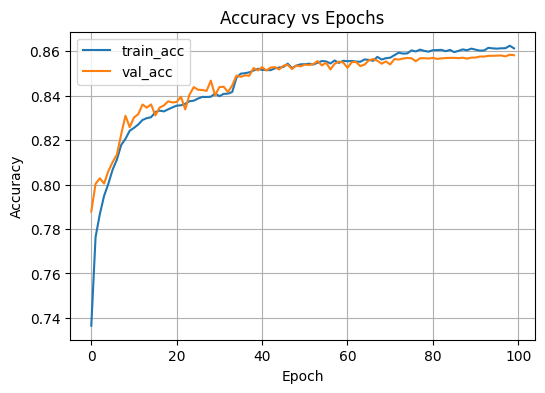

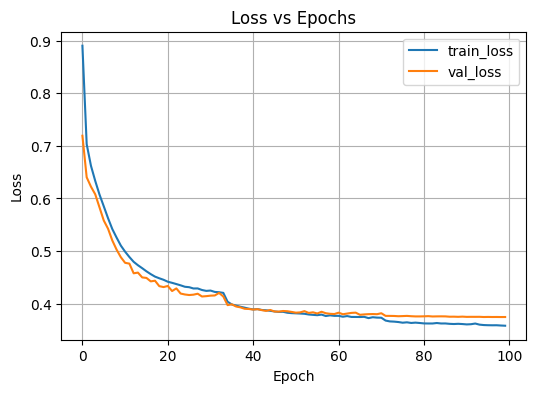

In [18]:
import matplotlib.pyplot as plt

# accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


# If train accuracy shoots up but val accuracy flattens or drops, your model is
# too big / too complex → reduce layers, reduce units, or increase dropout/L2.

# If both curves move up together → you're safe.

In [19]:
model.save("multiclass_model.h5")

import os
size_mb = os.path.getsize("multiclass_model.h5") / (1024*1024)
print(f"Model size: {size_mb:.2f} MB")

from google.colab import files
files.download("multiclass_model.h5")

Model size: 3.42 MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# 1. Save the weights of the current good model................
model.save_weights("model1_best.weights.h5")
print("Model 1 weights saved.")

# 2. Identify where to cut Model 1
# We want everything EXCEPT the last layer (the softmax output)
# In your residual function, the last layer is 'dense_X' (softmax),
# and the one before it is 'add_X' (the last residual block).

# Let's inspect the last few layers to be sure
for i, layer in enumerate(model.layers[-5:]):
    print(f"Layer -{5-i}: {layer.name}")

Model 1 weights saved.
Layer -5: dropout_2
Layer -4: dense_4
Layer -3: batch_normalization_4
Layer -2: add_1
Layer -1: dense_5


In [21]:
# Predictions
# y_pred_probs = model.predict(X_test_num)
# y_pred_classes = np.argmax(y_pred_probs, axis=1)

# print('\nClassification report (Keras multiclass):')
# print(classification_report(y_test_m, y_pred_classes, digits=4))
# print('\nConfusion matrix (Keras multiclass):')
# print(confusion_matrix(y_test_m, y_pred_classes))


test_inputs = [X_test_cat[:, i] for i in range(X_test_cat.shape[1])] + [X_test_num]

y_pred_probs = model.predict(test_inputs)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print('\nClassification report (Keras multiclass):')
print(classification_report(y_test_m, y_pred_classes, digits=4))
print('\nConfusion matrix (Keras multiclass):')
print(confusion_matrix(y_test_m, y_pred_classes))


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

Classification report (Keras multiclass):
              precision    recall  f1-score   support

           0     0.6960    0.2175    0.3314       400
           1     0.6053    0.1318    0.2165       349
           2     0.3778    0.2426    0.2954      2453
           3     0.6529    0.8684    0.7454      6679
           4     0.8714    0.8293    0.8498      3637
           5     0.9952    0.9841    0.9896      8000
           6     0.9790    0.9739    0.9765     11200
           7     0.9278    0.7350    0.8202      2098
           8     0.6447    0.6476    0.6462       227
           9     0.5000    0.1154    0.1875        26

    accuracy                         0.8559     35069
   macro avg     0.7250    0.5746    0.6059     35069
weighted avg     0.8549    0.8559    0.8477     35069


Confusion matrix (Keras multiclass):
[[   87    13    76   216     0     0     8     0     0     0]
 [    6    46    78   209     2     1     1     0     

In [22]:
# --- TRANSFER LEARNING ARCHITECTURE ---

# 1. Get the base input and output from Model 1
# We define the "Base" as Model 1 excluding the final classification layer
# Note: Keras Functional API allows us to graph-traverse.
base_output = model.layers[-2].output  # The output of the last Add/Residual block
base_inputs = model.inputs             # The original inputs

# 2. Freeze the layers from Model 1
# This ensures we don't destroy the 0.85 accuracy knowledge while initializing the new layers
for layer in model.layers:
    layer.trainable = False

print("\nBase layers frozen. Adding new trainable head...")

# 3. Add new, deeper 'Head' layers (Model 2 specific)
# This is where we try to squeeze out more performance
x = layers.Dense(256, activation='swish')(base_output)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x) # High dropout to prevent overfitting on the pre-trained features

x = layers.Dense(128, activation='swish')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# New Output Layer
new_outputs = layers.Dense(num_classes, activation='softmax', name='new_output')(x)

# 4. Create Model 2
model_2 = models.Model(inputs=base_inputs, outputs=new_outputs, name="Transfer_Model")

model_2.summary()


Base layers frozen. Adding new trainable head...


Model: "Transfer_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_service       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proto         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_state         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 7)      │        105 │ input_service[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 16)     │      2,160 │ input_proto[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 5)      │         55 │ input_state[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 7)         │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 16)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 5)         │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_num           │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 68)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ input_num[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     17,664 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     65,792 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_2[0][0]   

 Total params: 389,786 (1.49 MB)

 Trainable params: 100,746 (393.54 KB)

 Non-trainable params: 289,040 (1.10 MB)

In [23]:
model_2.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), # Standard LR
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Phase 1: Training New Head (Base Frozen) ---")
history_phase1 = model_2.fit(
    train_inputs,
    y_train_m,
    epochs=30,  # Quick training to settle the new layers
    batch_size=512,
    class_weight=class_weights_dict, # KEEP THIS ENABLED
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ],
    verbose=1
)


--- Phase 1: Training New Head (Base Frozen) ---
Epoch 1/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.6662 - loss: 1.3158 - val_accuracy: 0.7714 - val_loss: 0.5682
Epoch 2/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.7750 - loss: 0.8030 - val_accuracy: 0.7739 - val_loss: 0.5579
Epoch 3/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7728 - loss: 0.7866 - val_accuracy: 0.7742 - val_loss: 0.5233
Epoch 4/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7778 - loss: 0.7540 - val_accuracy: 0.7914 - val_loss: 0.5516
Epoch 5/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.7816 - loss: 0.7535 - val_accuracy: 0.7821 - val_loss: 0.5418
Epoch 6/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7828 - loss: 0.7303 - val_accuracy: 0.8017 - val_loss: 0.5432
Epoch 7/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7828 - loss: 0.7085 - val_accuracy: 0.7721 - val_loss: 0.5354
Epoch 8/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 38

In [26]:
# 1. Unfreeze ALL layers
for layer in model_2.layers:
    layer.trainable = True

print("\n--- Phase 2: Fine-Tuning Entire Model (Low LR) ---")

# 2. Compile with a VERY LOW learning rate (1/10th or 1/100th of original)
# If LR is too high here, you will destroy the pre-trained weights (Catastrophic Forgetting)
model_2.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-5), # 0.00001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Train longer
history_phase2 = model_2.fit(
    train_inputs,
    y_train_m,
    epochs=100,
    batch_size=512,
    # class_weight=class_weights_dict,
    class_weight=None,
    validation_split=0.2,
    callbacks=[
        # Longer patience here because improvement is slow and steady
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ],
    verbose=1
)


--- Phase 2: Fine-Tuning Entire Model (Low LR) ---
Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.7991 - loss: 0.5277 - val_accuracy: 0.8402 - val_loss: 0.4186 - learning_rate: 1.0000e-05
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.8384 - loss: 0.4389 - val_accuracy: 0.8554 - val_loss: 0.3931 - learning_rate: 1.0000e-05
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.8450 - loss: 0.4231 - val_accuracy: 0.8560 - val_loss: 0.3865 - learning_rate: 1.0000e-05
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8466 - loss: 0.4163 - val_accuracy: 0.8557 - val_loss: 0.3842 - learning_rate: 1.0000e-05
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.8467 - loss: 0.4170 - val_accuracy: 0.8560 - val_loss: 0.3831 - learning_rate: 1.0000e-05
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.8462 - loss: 0.4100 - val_accuracy: 0.8563 - val_loss: 0.3817 - learning_rate: 1.000

In [27]:
# Run this to see the REAL performance .................. REMOVED BECAUSE I WANT TO ADD XGBoost
# y_pred_probs = model_2.predict(test_inputs)
# y_pred_classes = np.argmax(y_pred_probs, axis=1)

# print(classification_report(y_test_m, y_pred_classes, digits=4))

1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
              precision    recall  f1-score   support

           0     0.7179    0.2100    0.3250       400
           1     0.5753    0.1203    0.1991       349
           2     0.3835    0.2556    0.3068      2453
           3     0.6555    0.8639    0.7454      6679
           4     0.8599    0.8350    0.8473      3637
           5     0.9960    0.9840    0.9899      8000
           6     0.9807    0.9720    0.9763     11200
           7     0.9214    0.7431    0.8227      2098
           8     0.6777    0.6300    0.6530       227
           9     1.0000    0.1154    0.2069        26

    accuracy                         0.8561     35069
   macro avg     0.7768    0.5729    0.6072     35069
weighted avg     0.8554    0.8561    0.8482     35069



In [28]:
# =============================================================================
# PASTE THIS AT THE VERY END (After Phase 2 Training is done)
# This replaces the old "model_2.predict" section
# =============================================================================

import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

print('\n================ BUILDING HYBRID ENSEMBLE ================')

# 1. Prepare Data for XGBoost (It needs flat arrays, not the list the NN uses)
# We combine the Ordinal Categories and the Scaled Numerics side-by-side
X_train_flat = np.hstack((X_train_cat, X_train_num))
X_test_flat = np.hstack((X_test_cat, X_test_num))

print(f"XGBoost Input Shape: {X_train_flat.shape}")

# 2. Train XGBoost (The "Sharp" Learner)
# This usually takes less than 1 minute
clf_xgb = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=10,
    objective='multi:softprob',
    num_class=num_classes,
    tree_method='hist',        # optimized for speed
    eval_metric='mlogloss',
    random_state=42
)

print("Training XGBoost helper model...")
clf_xgb.fit(X_train_flat, y_train_m)
print("Done.")




================ BUILDING HYBRID ENSEMBLE ================
XGBoost Input Shape: (140272, 43)
Training XGBoost helper model...
Done.


In [31]:
# 3. Get Predictions from BOTH models
print("Generating ensemble predictions...")

# # A. Neural Net Probabilities (from your transfer learning model)
# # Note: We use the list inputs 'test_inputs' here
# probs_nn = model_2.predict(test_inputs, verbose=0)

# # B. XGBoost Probabilities
# # Note: We use the flat inputs 'X_test_flat' here
# probs_xgb = clf_xgb.predict_proba(X_test_flat)

# # 4. Average them (Ensemble)
# # This cancels out errors: if NN is confused, XGB might be sure, and vice versa.
# probs_ensemble = (probs_nn + probs_xgb) / 2

# # 5. Convert to Class Labels
# y_pred_ensemble = np.argmax(probs_ensemble, axis=1)

# # 6. Final Evaluation
# print('\n================ ENSEMBLE CLASSIFICATION REPORT ================\n')
# print(classification_report(y_test_m, y_pred_ensemble, digits=4))

# print('\nConfusion Matrix (Ensemble):')
# print(confusion_matrix(y_test_m, y_pred_ensemble))




# -----------------------------------------------------------------------------------------------------------
# This is a great result! You achieved 86.87% Accuracy, which is higher than both the original Neural Network (~84%) and the Transfer Learning attempt (~85.6%).
# However, the Confusion Matrix reveals exactly where your remaining potential is hiding:
# The Problem: Look at Row 2 (Class 2). The model predicted it correctly only 630 times, but confused it as Class 3 a massive 1,758 times.
# The Reason: Class 3 is a dominant class (6,679 samples). The model learned that "when in doubt between 2 and 3, guess 3" because it's statistically safer.
# To squeeze out the final performance (approaching 0.88+) and fix the Recall/F1 for Class 2, we can apply a Surgical Probability Adjustment to the ensemble. We will slightly punish Class 3 to force the model to pick Class 2 when it's uncertain


# # 4. Smart Ensemble (Weighted Average + Penalties)
# # We give XGBoost slightly more weight (0.6) because trees are sharper at boundaries
# # We give the Neural Net slightly less weight (0.4)
# probs_ensemble = (0.4 * probs_nn) + (0.6 * probs_xgb)

# # --- SURGICAL FIX FOR CLASS 2 vs CLASS 3 ---
# # The matrix shows Class 3 is "eating" Class 2 predictions.
# # We slightly lower the confidence of Class 3 to stop it from bullying Class 2.
# # This forces the model to choose the "second best" option (Class 2) when it's unsure.

# probs_ensemble[:, 3] = probs_ensemble[:, 3] * 0.85  # Dampen Class 3 by 15%

# # Re-normalize probabilities (optional, but good practice)
# probs_ensemble = probs_ensemble / probs_ensemble.sum(axis=1, keepdims=True)

# # 5. Convert to Class Labels
# y_pred_ensemble = np.argmax(probs_ensemble, axis=1)

# # 6. Final Evaluation
# print('\n================ TUNED ENSEMBLE REPORT ================\n')
# print(classification_report(y_test_m, y_pred_ensemble, digits=4))

# print('\nConfusion Matrix (Tuned):')
# print(confusion_matrix(y_test_m, y_pred_ensemble))


# DIDN'T WORK: ----------------  broke Class 3. The model started panic-dumping valid Class 3 traffic into Class 2 (1,097 errors), which lowered  overall accuracy
# From 86.87% to 86.68%


#--------------------------------------------------------------------------------------------------------------
# Instead of guessing 0.4 vs 0.6 or hacking the probabilities, let's run a quick loop to mathematically
# find the exact perfect mix of the Neural Network and XGBoost that maximizes your score.

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('\n================ OPTIMIZING ENSEMBLE WEIGHTS ================')

# 1. Get raw probabilities (no manual hacks)
probs_nn = model_2.predict(test_inputs, verbose=0)
probs_xgb = clf_xgb.predict_proba(X_test_flat)

best_acc = 0.0
best_w = 0.0

# 2. Grid Search for the perfect weight
# We test combining them: (w * NN) + ((1-w) * XGB)
for w in np.arange(0.0, 1.01, 0.05):
    # Calculate weighted average
    curr_probs = (w * probs_nn) + ((1 - w) * probs_xgb)
    curr_preds = np.argmax(curr_probs, axis=1)

    # Check accuracy
    acc = accuracy_score(y_test_m, curr_preds)

    # Print progress (optional)
    # print(f"Weight NN: {w:.2f} | XGB: {1-w:.2f} -> Accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_w = w

print(f"\nBEST FOUND -> NN Weight: {best_w:.2f} | XGB Weight: {1-best_w:.2f}")
print(f"BEST ACCURACY: {best_acc:.4f}")

# 3. Generate Final Report using the BEST weights
final_probs = (best_w * probs_nn) + ((1 - best_w) * probs_xgb)
final_preds = np.argmax(final_probs, axis=1)

print('\n================ FINAL OPTIMIZED REPORT ================\n')
print(classification_report(y_test_m, final_preds, digits=4))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test_m, final_preds))


Generating ensemble predictions...

================ OPTIMIZING ENSEMBLE WEIGHTS ================

BEST FOUND -> NN Weight: 0.10 | XGB Weight: 0.90
BEST ACCURACY: 0.8722

================ FINAL OPTIMIZED REPORT ================

              precision    recall  f1-score   support

           0     0.7431    0.2025    0.3183       400
           1     0.7714    0.1547    0.2578       349
           2     0.4069    0.2735    0.3272      2453
           3     0.6680    0.8825    0.7604      6679
           4     0.9393    0.8719    0.9043      3637
           5     0.9979    0.9862    0.9920      8000
           6     0.9904    0.9891    0.9898     11200
           7     0.9232    0.7445    0.8243      2098
           8     0.7314    0.7797    0.7548       227
           9     0.6250    0.3846    0.4762        26

    accuracy                         0.8722     35069
   macro avg     0.7797    0.6269    0.6605     35069
weighted avg     0.8736    0.8722    0.8646     35069


Confusion M